In [2]:
import pandas as pd
df = pd.read_csv('combine_with_features.txt',sep='\t')

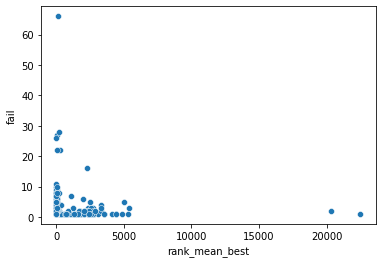

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(16, 8))

sns.scatterplot(x=df.rank_mean_best,y =df.fail)

c:\users\stefa\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


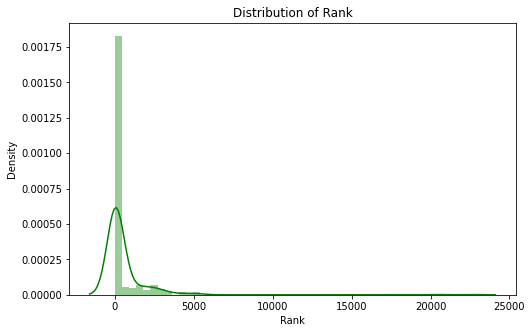

           bug_id  rank_mean_best  rank_min_best  rank_max_best  \
count  395.000000      395.000000     395.000000     395.000000   
mean    46.068354      523.712658     525.201266     522.145570   
std     35.020993     1771.925542    1771.581582    1772.306455   
min      1.000000        1.000000       1.000000       1.000000   
25%     17.000000        4.000000       4.000000       4.000000   
50%     37.000000       17.000000      17.000000      16.000000   
75%     70.500000      139.000000     153.750000     124.750000   
max    133.000000    22502.000000   22502.000000   22502.000000   

       rank_best_case  Compare_SBFL_Better  Improvement_Case_MEANVSBESTCASE  \
count      395.000000           395.000000                       395.000000   
mean       417.309200             0.498734                        -0.073418   
std       2370.643726             0.500633                         2.452012   
min          1.000000             0.000000                        -6.000000   
2

In [9]:
sns.set_palette('muted')

# create initial figure
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)
sns.distplot(df['rank_mean_best'], color='g', label="Popularity").set_title("Distribution of Rank")

# create x and y axis labels
plt.xlabel("Rank")
plt.ylabel("Density")

plt.show()
print(df.describe())


<Figure size 1152x1152 with 0 Axes>

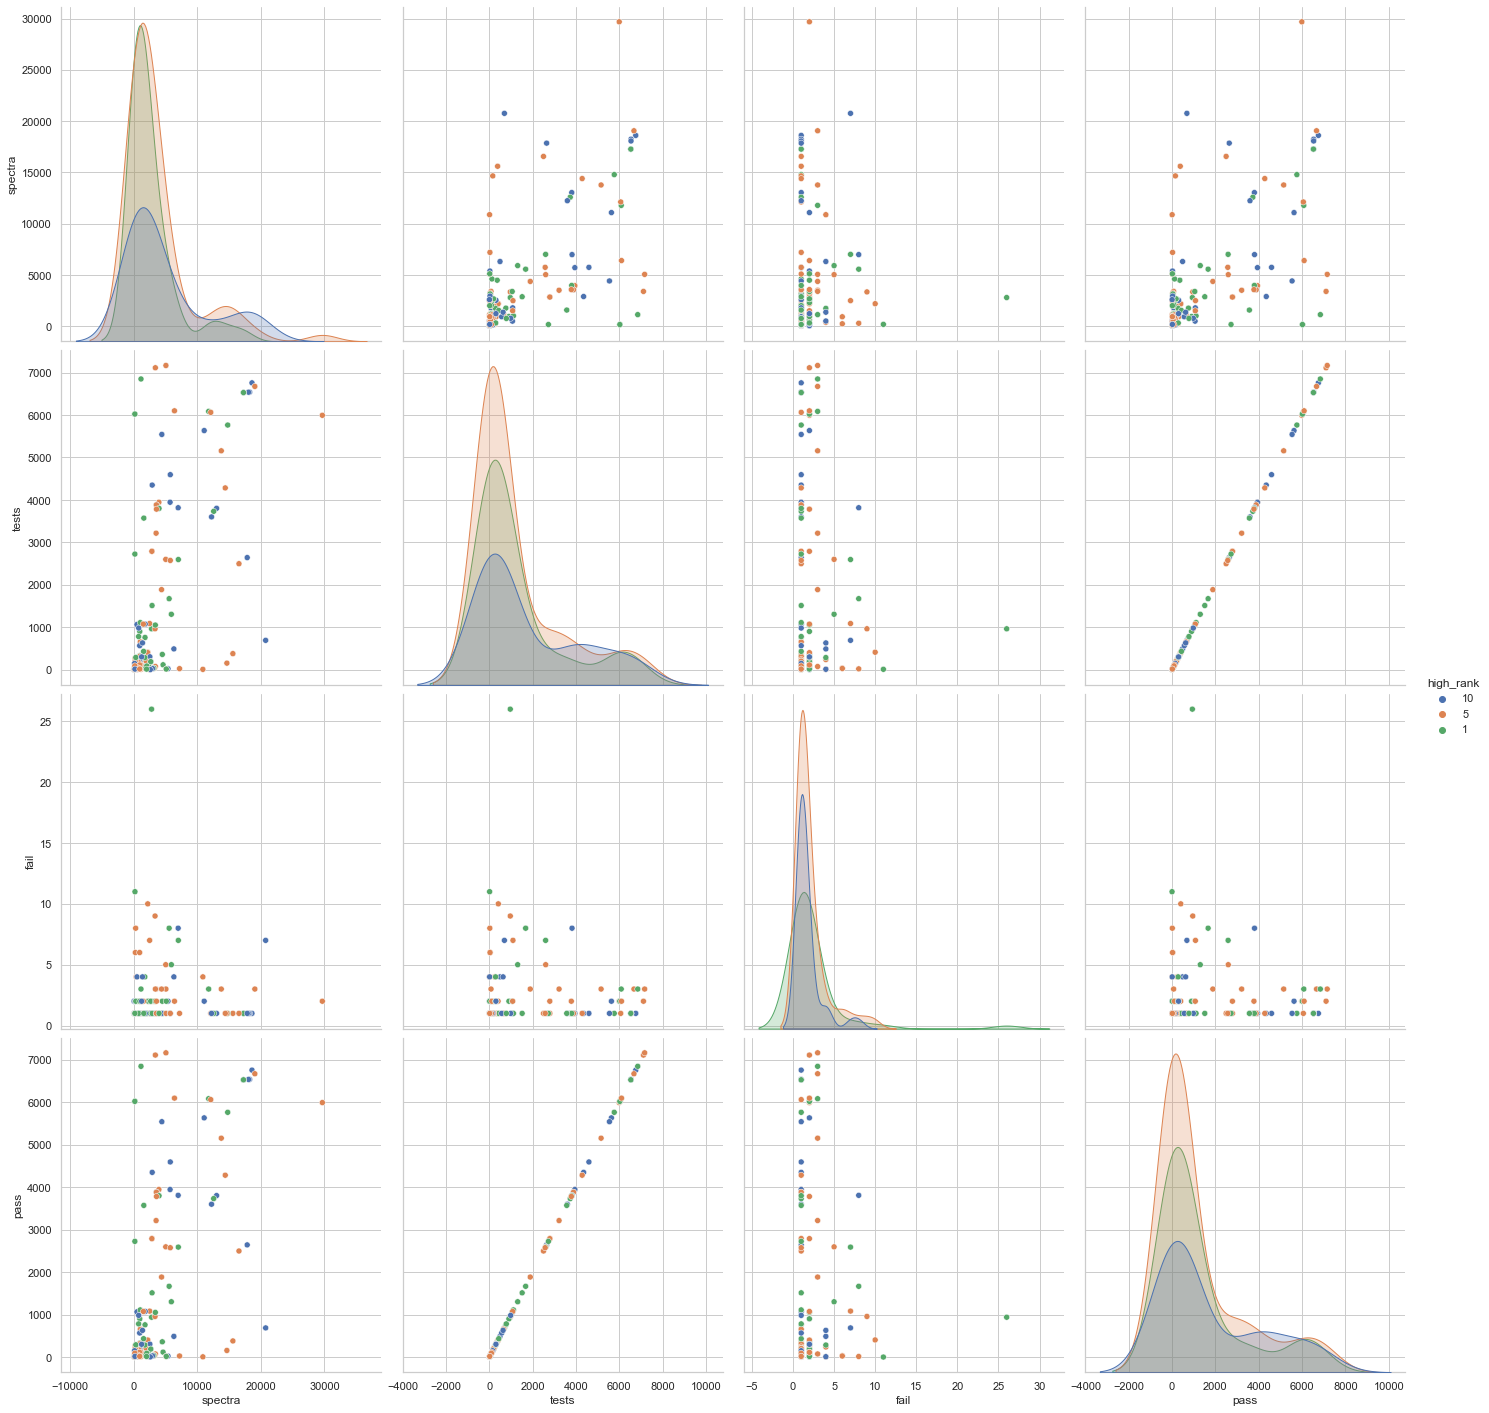

In [44]:
import numpy as np
top_x = 1
col         = 'rank_max_best'
conditions  = [ df[col] > 200, (df[col] <= 200) & (df[col]> 10), (df[col] <= 10) & (df[col]> 5), (df[col] <= 5) & (df[col]> 1), df[col] <= 1 ]
choices     = [ "bad", "200", "10", "5", "1" ]
    
df['high_rank'] = np.select(conditions, choices, default=np.nan)
plt.figure(figsize=(16, 16))
#df['high_rank'] = np.where(df['rank_max_best'] <= top_x, "good", "not_good")
cols_for_pp = ['spectra', 'tests', 'fail', 'pass', 'high_rank']
#cols_for_pp = ['rank_max_best','spectra', '1_max', 'high_rank']


sns.pairplot(df[df['rank_max_best']<=10][cols_for_pp], hue='high_rank', height=len(choices))
plt.show()

    project_id  bug_id  rank_mean_best  rank_min_best  rank_max_best  \
0        Chart       1            42.0           42.0           42.0   
1        Chart       2            50.0           48.0           51.0   
2        Chart       3             7.0            7.0            7.0   
3        Chart       4           285.0          280.0          241.0   
4        Chart       5             5.0            5.0            5.0   
..         ...     ...             ...            ...            ...   
390       Time      23             1.0            1.0            1.0   
391       Time      24          1110.0         1110.0         1110.0   
392       Time      25            96.0           67.0          109.0   
393       Time      26            73.0          105.0           80.0   
394       Time      27           759.0          759.0          759.0   

     rank_best_case  Compare_SBFL_Better  Improvement_Case_MEANVSBESTCASE  \
0         36.000000                    1                  

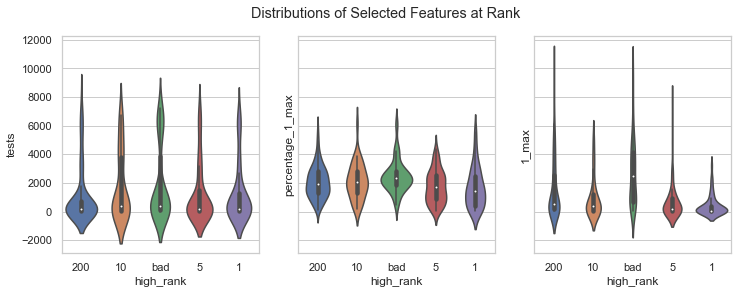

In [28]:
sns.set(style="whitegrid")
    
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))
fig.suptitle('Distributions of Selected Features at Rank')
df['percentage_1_max'] = (df['1_max']/df['spectra'])*10000 
print(df)
sns.violinplot(x=df['high_rank'], y=df['tests'], ax=ax[0])
sns.violinplot(x=df['high_rank'], y=df['percentage_1_max'], ax=ax[1])
sns.violinplot(x=df['high_rank'], y=df['1_max'], ax=ax[2])

plt.show()

c:\users\stefa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


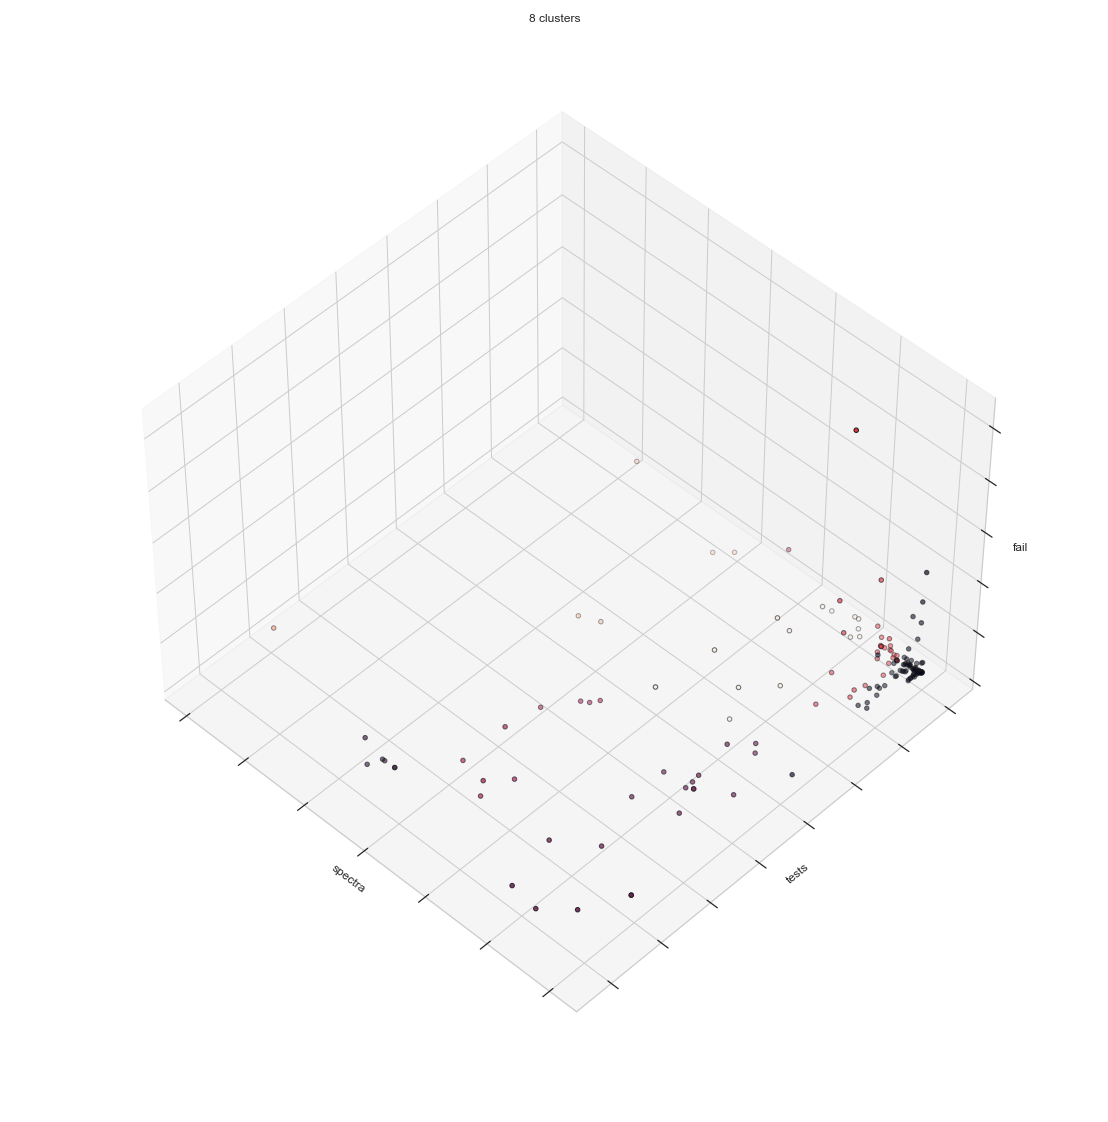

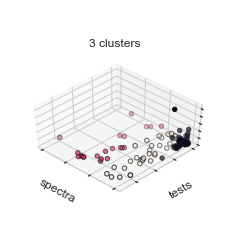

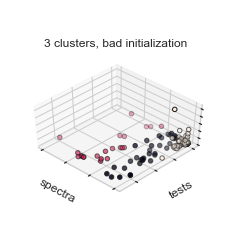

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


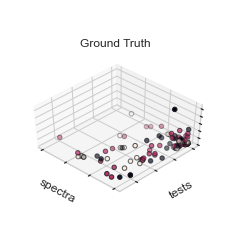

<Figure size 1152x1152 with 0 Axes>

In [41]:

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

df_temp = df.copy()
df_temp = df[df['rank_max_best'] <= 10]
plt.figure(figsize=(16, 16))
#df['high_rank'] = np.where(df['rank_max_best'] <= top_x, "good", "not_good")
cols = ['spectra', 'tests', 'fail']
X = df_temp[cols]
y = df_temp['high_rank'].astype(int)

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['spectra'], X['tests'], X['fail'],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('spectra')
    ax.set_ylabel('tests')
    ax.set_zlabel('fail')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('1', 0),
                    ('5', 1),
                    ('10', 2)]:
    ax.text3D(df_temp[df_temp['high_rank'] == label]['spectra'].mean(),
              df_temp[df_temp['high_rank'] == label]['tests'].mean(),
              df_temp[df_temp['high_rank'] == label]['fail'].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results

# iris = datasets.load_iris()
# g = iris.target
# print(g)
# print(y)
#y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X['spectra'], X['tests'], X['fail'], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('spectra')
ax.set_ylabel('tests')
ax.set_zlabel('fail')
ax.set_title('Ground Truth')
ax.dist = 12
plt.figure(figsize=(16, 16))

fig.show()